# SI 618 Homework 2
---------------------------
Name: Junqi Chen 

Uniqname: junqich

---------------------------

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1: Describe the dataset

In [422]:
# Q1-1
invoices = pd.read_json("invoices.json")
items = pd.read_json("items.json")
purchases = pd.read_json("purchases.json")
invoices.head(), items.head(), purchases.head()

(  InvoiceNo   InvoiceDate  CustomerID         Country
 0    536365  12/1/10 8:26     17850.0  United Kingdom
 1    536366  12/1/10 8:28     17850.0  United Kingdom
 2    536367  12/1/10 8:34     13047.0  United Kingdom
 3    536368  12/1/10 8:34     13047.0  United Kingdom
 4    536369  12/1/10 8:35     13047.0  United Kingdom,
   StockCode                          Description  UnitPrice
 0    85123A   WHITE HANGING HEART T-LIGHT HOLDER       2.55
 1     71053                  WHITE METAL LANTERN       3.39
 2    84406B       CREAM CUPID HEARTS COAT HANGER       2.75
 3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       3.39
 4    84029E       RED WOOLLY HOTTIE WHITE HEART.       3.39,
   InvoiceNo StockCodeSC  Quantity
 0    536365    SC85123A         6
 1    536365     SC71053         6
 2    536365    SC84406B         8
 3    536365    SC84029G         6
 4    536365    SC84029E         6)

In [423]:
# Q1-2
shipped_rows = [("C" not in s) for s in invoices["InvoiceNo"]]
invoices_shipped = invoices[shipped_rows]
print("The fraction of invoices were shipped is:", len(invoices_shipped) / len(invoices))

The fraction of invoices were shipped is: 0.8520988320548896


In [424]:
# Q1-3
print("There are", len(invoices["CustomerID"].unique()), "unique customers.")

There are 4373 unique customers.


In [425]:
# Q1-4
print("The total number of unique items with a unit price greater than 2 is",
      sum(items.drop_duplicates(subset=["StockCode"])["UnitPrice"] > 2) )

The total number of unique items with a unit price greater than 2 is 2262


In [426]:
# Q1-5
def isNullInColumn(df):
    # return a name list of column with null value
    isnull = [df[colname].isnull().values.any() for colname in df.columns]
    return list(df.columns[isnull])

print("There are column(s) named", isNullInColumn(invoices), "with null value in dataframe invoices.")
print("There are column(s) named", isNullInColumn(items), "with null value in dataframe items.")
print("There are column(s) named", isNullInColumn(purchases), "with null value in dataframe purchases.")
print("(The empty list means there is no column with null value in the dataframe.)")

There are column(s) named ['CustomerID'] with null value in dataframe invoices.
There are column(s) named ['Description'] with null value in dataframe items.
There are column(s) named [] with null value in dataframe purchases.
(The empty list means there is no column with null value in the dataframe.)


In [427]:
# CAUTION!: you can also rerun the whole program after commenting these two lines,
# the answer will be completely different!!!

invoices = invoices.dropna()
items = items.dropna() # drop the null value in every dataframe

In [428]:
# Q1-6

Looking closely on the three dataframes we load, we can discover that:

+ Column *InvoiceNo* is shared by both dataframes `invoices` and `purchases`.

+ Column *StockCode* in `items` has some connection to the column *StockCodeSC* in `purchases`.

So I am going to merge the dataframes `invoices` and `purchases` with the same column *InvoiceNo*. Also, I can also explore the relationship between columns *StockCode* and *StockCodeSC* so that all three dataframes can be merge into one.

## Q2: Invoice Analysis

In [429]:
# Q2-1
shipped_invoices_number = invoices_shipped.groupby("CustomerID").count()["InvoiceNo"]
print("The top 10 customers with most shipped placed are: ")
shipped_invoices_number.sort_values(ascending = False).head(10)

The top 10 customers with most shipped placed are: 


CustomerID
12748.0    211
14911.0    202
17841.0    124
13089.0     97
14606.0     95
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [430]:
# Q2-2
invoices_shipped_purchases = pd.merge(invoices_shipped, purchases, on = "InvoiceNo")
avg_quantity = invoices_shipped_purchases.groupby(["CustomerID", "InvoiceNo"]).mean()
print("The top 10 customers with the average quantity of items per invoice per customer are: ")
avg_quantity.sort_values(by = "Quantity", ascending = False).head(10)

The top 10 customers with the average quantity of items per invoice per customer are: 


,,Quantity
CustomerID,InvoiceNo,
16446.0,581483,80995.0
12346.0,541431,74215.0
13256.0,578841,12540.0
13135.0,554868,4300.0
18087.0,544612,3906.0
14609.0,560599,3186.0
16308.0,573995,3000.0
16029.0,543669,2400.0
14646.0,573003,2400.0


In [431]:
# Q2-3
avg_quantity.sort_values(by = "Quantity").head(10)

Quantity
CustomerID InvoiceNo          
12748.0    576389          1.0
17988.0    563229          1.0
12748.0    541248          1.0
           540251          1.0
           539987          1.0
           539921          1.0
13069.0    537048          1.0
14866.0    560868          1.0
17961.0    560913          1.0
14866.0    561368          1.0

From the ascending quantity per customer per invoice, we can find out that a customer with ID 12748 is the one that with the most shipped placed. Hence we can infer that there are certain possibility for that statement " the more invoices a customer have, the smaller the average size of an invoice" to be true. However, it should be detailed checked with the plots for `Quantity` and `InvoiceNum` according to the `CustomerID`.

# Q3: Item Analysis
*The answers for the following questions will be directly shown in output without extra comment.*

In [432]:
# Q3-1
items["UnitPrice"].median()

2.51

In [433]:
# Q3-2
len(items[items["UnitPrice"] > 10]) / len(items)

0.06651258346173601

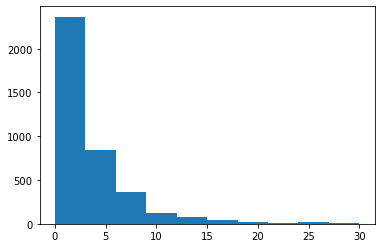

In [434]:
# Q3-3
plt.hist(items["UnitPrice"], bins=10, range=(0, 30))
plt.show()

# Q4: Order Trends

In [435]:
# Q4-1
purchases["StockCode"] = purchases["StockCodeSC"].map(lambda x: x[2:])
df_purchases_items = purchases.merge(items, on="StockCode", how="outer")
df_all = df_purchases_items.merge(invoices, on='InvoiceNo', how='right') # merge all three dataframes

df_all.groupby("StockCode").sum()["Quantity"].sort_values(ascending=False).head(10)

StockCode
84077     53264
22197     48879
85099B    45190
84879     35366
85123A    34330
21212     33425
23084     27094
22492     25881
22616     25333
21977     24178
Name: Quantity, dtype: int64

In [436]:
# Q4-2
df_all.groupby("StockCode").count()["InvoiceNo"].sort_values(ascending=False).head(10)

StockCode
85123A    2085
22423     1911
85099B    1669
47566     1423
84879     1421
20725     1363
22720     1234
POST      1197
20727     1131
22197     1122
Name: InvoiceNo, dtype: int64

In [437]:
# Q4-3
df_all['Revenue'] = df_all['Quantity'] * df_all['UnitPrice'] * 1.25
df_all.groupby('InvoiceNo').sum()['Revenue'].sort_values(ascending=False).head(5)

InvoiceNo
581483    210587.0000
541431     96479.5000
556255     37305.0000
556917     34545.9125
572035     32872.2000
Name: Revenue, dtype: float64

# Q5: Customer Analysis

In [438]:
# Q5-1
df_revenue = df_all.groupby("CustomerID").sum()
bins = df_revenue["Revenue"].quantile([0, .25, .5, .75, 1])
df_revenue["Revenue_level"] = pd.cut(df_revenue["Revenue"], bins, labels=["Q1", "Q2", "Q3", "Q4"])
df_revenue_dummies = pd.concat([df_revenue["Revenue"], pd.get_dummies(df_revenue["Revenue_level"])], axis = 1)
df_revenue_dummies

,Revenue,Q1,Q2,Q3,Q4
CustomerID,,,,,
12346.0,0.000,1,0,0,0
12347.0,6798.050,0,0,0,1
12348.0,2237.700,0,0,1,0
12349.0,2408.700,0,0,1,0
12350.0,510.050,0,1,0,0
...,...,...,...,...,...
18280.0,317.075,1,0,0,0
18281.0,84.350,1,0,0,0
18282.0,282.650,1,0,0,0


In [439]:
# Q5-2
df_revenue.groupby("Revenue_level").sum()["Revenue"]

Revenue_level
Q1    2.600350e+05
Q2    7.359469e+05
Q3    1.712705e+06
Q4    1.004517e+07
Name: Revenue, dtype: float64

In [440]:
# Q5-3
df_pivot = df_revenue[["Revenue", "Revenue_level"]].merge(df_all[['CustomerID', 'Quantity', 'StockCode']], how='right', on='CustomerID')
df_pivot.pivot_table(index='StockCode', columns='Revenue_level', values='Quantity', aggfunc=np.mean)

Revenue_level,Q1,Q2,Q3,Q4
StockCode,,,,
10002,1.000000,7.000000,8.166667,18.825000
10080,NaN,24.000000,7.750000,14.750000
10120,3.000000,4.000000,5.333333,8.187500
10123C,1.000000,3.000000,1.000000,NaN
10124A,3.500000,NaN,1.000000,4.000000
...,...,...,...,...
D,NaN,NaN,-1.000000,-15.893333
DOT,NaN,NaN,NaN,1.000000
M,-37.274510,1.255319,4.103448,16.567376
